In [1]:
import urllib.request
import json
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [35]:
r = urllib.request.urlopen("http://api.wunderground.com/api/SECRETKEY/conditions/q/72034.json")

In [36]:
data = r.read().decode("utf-8")

In [37]:
r.close()

In [38]:
data

'\n{\n  "response": {\n  "version":"0.1",\n  "termsofService":"http://www.wunderground.com/weather/api/d/terms.html",\n  "features": {\n  "conditions": 1\n  }\n\t}\n  ,\t"current_observation": {\n\t\t"image": {\n\t\t"url":"http://icons.wxug.com/graphics/wu2/logo_130x80.png",\n\t\t"title":"Weather Underground",\n\t\t"link":"http://www.wunderground.com"\n\t\t},\n\t\t"display_location": {\n\t\t"full":"Conway, AR",\n\t\t"city":"Conway",\n\t\t"state":"AR",\n\t\t"state_name":"Arkansas",\n\t\t"country":"US",\n\t\t"country_iso3166":"US",\n\t\t"zip":"72034",\n\t\t"magic":"1",\n\t\t"wmo":"99999",\n\t\t"latitude":"35.08861160",\n\t\t"longitude":"-92.44194031",\n\t\t"elevation":"97.00000000"\n\t\t},\n\t\t"observation_location": {\n\t\t"full":"Pamela Ln., Conway, Arkansas",\n\t\t"city":"Pamela Ln., Conway",\n\t\t"state":"Arkansas",\n\t\t"country":"US",\n\t\t"country_iso3166":"US",\n\t\t"latitude":"35.093822",\n\t\t"longitude":"-92.415909",\n\t\t"elevation":"315 ft"\n\t\t},\n\t\t"estimated": {\n\t\t

In [17]:
decoded = json.loads(data)

In [18]:
decoded

{'current_observation': {'UV': '10',
  'dewpoint_c': 25,
  'dewpoint_f': 76,
  'dewpoint_string': '76 F (25 C)',
  'display_location': {'city': 'Conway',
   'country': 'US',
   'country_iso3166': 'US',
   'elevation': '88.00000000',
   'full': 'Conway, AR',
   'latitude': '35.06729889',
   'longitude': '-92.38079834',
   'magic': '1',
   'state': 'AR',
   'state_name': 'Arkansas',
   'wmo': '99999',
   'zip': '72032'},
  'estimated': {},
  'feelslike_c': '43',
  'feelslike_f': '109',
  'feelslike_string': '109 F (43 C)',
  'forecast_url': 'http://www.wunderground.com/US/AR/Conway.html',
  'heat_index_c': 43,
  'heat_index_f': 109,
  'heat_index_string': '109 F (43 C)',
  'history_url': 'http://www.wunderground.com/weatherstation/WXDailyHistory.asp?ID=KARCONWA27',
  'icon': 'partlycloudy',
  'icon_url': 'http://icons.wxug.com/i/c/k/partlycloudy.gif',
  'image': {'link': 'http://www.wunderground.com',
   'title': 'Weather Underground',
   'url': 'http://icons.wxug.com/graphics/wu2/logo_1

In [19]:
location = decoded["current_observation"]["observation_location"]["city"]

In [20]:
location

'Pamela Ln., Conway'

In [21]:
temp = decoded["current_observation"]["temp_f"]

In [22]:
print("Current weather is " + str(temp) + " in " + location)

Current weather is 94.6 in Pamela Ln., Conway


In [23]:
r = urllib.request.urlopen("http://api.wunderground.com/api/SECRETKEY/hourly10day/q/AR/Conway.json")

In [24]:
data = r.read().decode("utf-8")
r.close()
decoded = json.loads(data)

In [28]:
time = []
temp = []
feels = []

for e in decoded["hourly_forecast"]:
    time.append((float(e['FCTTIME']["epoch"]) - 
               float(decoded["hourly_forecast"][0]["FCTTIME"]["epoch"])) / 86400)
    temp.append((float(e['temp']['english'])))
    feels.append(float(e['feelslike']['english']))

(0, 100)

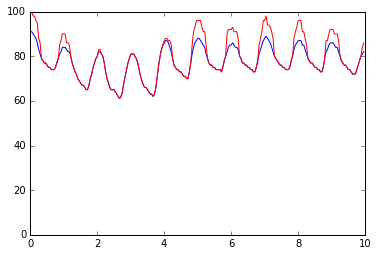

In [34]:
plt.plot(time, temp)
plt.plot(time, feels, color="r")
plt.ylim([0, 100])